In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [434]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
import statsmodels.formula.api as smf

In [1]:
a = pd.read_csv("D:Train.csv")

NameError: name 'pd' is not defined

In [467]:
a.head()

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [468]:
a.shape

(9568, 5)

In [469]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [470]:
a.describe() # NO need to remove outliers because 75% and max are close

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.723857,54.461361,1013.318927,73.165178,466.473971
std,7.407995,12.679972,5.906082,14.618969,17.040831
min,2.340000,25.360000,993.110000,25.890000,433.506276
25%,13.560000,41.780000,1009.210000,62.990000,451.893897
50%,20.550000,52.750000,1013.030000,74.855000,463.379534
75%,25.770000,66.560000,1017.342500,84.790000,480.565764
max,37.110000,81.560000,1033.300000,100.160000,509.381540


In [471]:
a.isnull().sum() # no null values

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [472]:
# no categorical columns 
a.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.842054,-0.514305,-0.541602,-0.946352
V,0.842054,1.000000,-0.415093,-0.306395,-0.867356
AP,-0.514305,-0.415093,1.000000,0.115454,0.520058
RH,-0.541602,-0.306395,0.115454,1.000000,0.387785
PE,-0.946352,-0.867356,0.520058,0.387785,1.000000


In [473]:
a.skew()

AT   -0.149024
V     0.177096
AP    0.240197
RH   -0.423511
PE    0.322296
dtype: float64

In [474]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,RobustScaler

In [475]:
X = a.drop('PE', axis = 1)

In [476]:
y = a['PE']

In [477]:
sc=StandardScaler()
Xs = sc.fit_transform(X)

In [418]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC

In [201]:
en = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

In [359]:
import statsmodels.api as sm
from statsmodels.api import add_constant

In [459]:
Xc=sm.add_constant(X)

In [460]:
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                 2.547e+04
Date:                Mon, 27 Jul 2020   Prob (F-statistic):               0.00
Time:                        00:48:06   Log-Likelihood:                -30201.
No. Observations:                9568   AIC:                         6.041e+04
Df Residuals:                    9564   BIC:                         6.044e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        466.4740      0.058   8026.890      0.000     466.360     466.588
pc1          -15.5326      0.058   -267.265      0.000     -15.647     -15.419
pc2           -1.5046      0.058    -25.890      0.000      -1.619      -1.391
pc3            3.8159      0.058     65.659      0.000       3.702       3.930
==============================================================================
Omnibus:                       94.226   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.547
Skew:                          -0.048   Prob(JB):                     4.55e-34
Kurtosis:                       3.613   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [380]:
a.skew()

AT    -0.149024
V      0.177096
AP     0.240197
RH    -0.423511
PE     0.322296
RH2   -0.026018
dtype: float64

In [ ]:
import seaborn as sns

sns.distplot(model.resid)

In [ ]:
# not normal

In [ ]:
model.resid.skew() # left skewed

In [ ]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(res=model, frac=0.5)

In [ ]:
model.resid.mean()

In [ ]:
import scipy.stats as stats
import pylab
from statsmodels.graphics.gofplots import ProbPlot
st_residual = model.get_influence().resid_studentized_internal
stats.probplot(st_residual, dist="norm", plot = pylab)
plt.show()

In [ ]:
# linearity is present, residue mean is close to 0

In [462]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame({'vif': vif[1:]}, index=Xs.columns).T

,pc1,pc2,pc3
vif,1.0,1.0,1.0


In [ ]:
sns.heatmap(a.corr(), annot=True)

In [ ]:
sns.pairplot(a)

In [17]:
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score,KFold
import xgboost as xgb

In [ ]:
RF_ve=[]
RF_be=[]
for i in np.arange(1,100):

    RF=RandomForestRegressor(n_estimators=i,random_state=0)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    mse=cross_val_score(RF,Xs,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(mse))
    RF_be.append(np.mean(rmse))
    RF_ve.append(np.std(rmse,ddof=1))

In [ ]:
X_axis=np.arange(len(RF_ve))
plt.plot(X_axis,RF_ve)

In [ ]:
np.argmin(RF_ve)

In [ ]:
X_axis=np.arange(len(RF_be))
plt.plot(X_axis,RF_be)

In [ ]:
np.argmin(RF_be),np.min(RF_be)

In [ ]:
GB_bias=[]
GB_ve=[]
for n in np.arange(1,100):
    GB=GradientBoostingRegressor(n_estimators=n,random_state=0)
    scores=cross_val_score(GB,Xs,y,cv=3,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(scores))
    GB_bias.append(np.mean(rmse))
    GB_ve.append((np.std(rmse,ddof=1)))

In [ ]:
x_axis=np.arange(len(GB_bias))
plt.plot(x_axis,GB_bias)

In [ ]:
np.argmin(GB_ve),np.min(GB_ve)

In [ ]:
RF=RandomForestRegressor(n_estimators=9,random_state=0)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
mo = RF.fit(X_train,Y_train)

In [ ]:
pred = mo.predict(X_test)

In [20]:
import sklearn

In [ ]:
mse = sklearn.metrics.mean_squared_error(Y_test, pred)
rmse = np.sqrt(mse)
rmse

In [ ]:
ABRF_be=[]
for i in np.arange(1,100):
    ABRF=AdaBoostRegressor(base_estimator=RF1,n_estimators=i,random_state=0)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    mse=cross_val_score(ABRF,Xs,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(mse))
    ABRF_be.append(np.mean(rmse))


In [ ]:
params={'n_estimators': np.arange(1,200)}

In [ ]:
from sklearn.model_selection import cross_val_score,GridSearchCV

rfc = AdaBoostRegressor(base_estimator = RF1,random_state = 0) 

GS=GridSearchCV(rfc,params,cv=3,scoring='neg_mean_squared_error')

GS.fit(Xs, y)

In [ ]:
pip install scikit-garden

In [22]:
from sklearn.svm import SVR

In [21]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor, ExtraTreesRegressor
from catboost import CatBoostRegressor

In [ ]:
knn_be=[]
for i in np.arange(1,100):
    knn=KNeighborsRegressor(n_neighbors=i,metric='euclidean',weights='distance')
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    mse=cross_val_score(knn,Xs,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(mse))
    knn_be.append(np.mean(rmse))

In [ ]:
X_axis=np.arange(len(knn_be))
plt.plot(X_axis,knn_be)

In [ ]:
np.min(knn_be),np.argmin(knn_be)

In [ ]:
knn_bag_be=[]
for i in np.arange(1,200):
    knn_bag=BaggingRegressor(base_estimator = knn,n_estimators=i,random_state=0)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    mse=cross_val_score(knn_bag,Xs,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(mse))
    knn_bag_be.append(np.mean(rmse))

In [ ]:
X_axis=np.arange(len(knn_bag_be))
plt.plot(X_axis,knn_bag_be)

In [ ]:
np.min(knn_bag_be),np.argmin(knn_bag_be)

In [209]:
from hyperopt import hp,Trials,STATUS_OK,fmin,tpe

In [ ]:
def f(params):
    
    
        
    clf = xgb.XGBRegressor(n_estimators =int(params['n_estimators']), max_depth = int(params['max_depth']), gamma = params['gamma'],
                    reg_alpha = int(params['reg_alpha']),min_child_weight=int(params['min_child_weight']),
                    colsample_bytree=int(params['colsample_bytree']))
    score = cross_val_score(clf, Xs, y, cv=3, scoring="neg_mean_squared_error", n_jobs=-1).mean()
    return{'loss': -score,'status':STATUS_OK}  # objective function


trails = Trials()

seed = 100

In [ ]:
best = fmin(f,space,algo = tpe.suggest,max_evals = 50,trials = trails)

In [ ]:
print('best:',best)

In [ ]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': hp.quniform('n_estimators', 100, 2000, 1)
        
    }

In [23]:
from lightgbm.sklearn import LGBMRegressor
from sklearn.metrics import mean_squared_error

### Hyperopt

In [225]:
def gb_mse_cv(params,cv=3, X=Xs, y=y):
    # the function gets a set of variable parameters in "param"
    params = {'n_estimators': int(params['n_estimators']), 
              'max_depth': int(params['max_depth']), 
             'learning_rate': params['learning_rate'],
             'num_leaves': int(params['num_leaves']),
        'colsample_bytree': '{:.3f}'.format(params['colsample_bytree']),
              #'bagging_fraction': int(params['bagging_fraction']),
              #'feature_fraction': int(params['feature_fraction']),
              'max_bin': int(params['max_bin']),
              'min_data_in_leaf': int(params['min_data_in_leaf']),
             }
    
    # we use this params to create a new LGBM Regressor
    model = LGBMRegressor(**params)
    
    # and then conduct the cross validation with the same folds as before
    score = -cross_val_score(model, Xs, y, cv=cv, scoring="neg_mean_squared_error", n_jobs=-1).mean()

    return score

In [226]:
# possible values of parameters
space={'n_estimators': hp.quniform('n_estimators', 100, 2000, 1),
       'max_depth' : hp.quniform('max_depth', 2, 20, 1),
       'learning_rate': hp.loguniform('learning_rate', -5, 1),
       'num_leaves': hp.quniform('num_leaves', 8, 128, 2),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0),
       #'bagging_fraction': hp.uniform('bagging_fraction',0.1 ,1.0),
       #'feature_fraction': hp.uniform('feature_fraction',0.1,1.0),
       'max_bin': hp.uniform('max_bin',5,55),
       'min_data_in_leaf':hp.uniform('min_data_in_leaf',2,10)
      }

# trials will contain logging information
trials = Trials()

best=fmin(fn=gb_mse_cv, # function to optimize
          space=space, 
          algo=tpe.suggest, # optimization algorithm, hyperotp will select its parameters automatically
          max_evals=50, # maximum number of iterations
          trials=trials # logging
         # fixing random state for the reproducibility
         )



100%|█████████████████████████████████████████████████| 50/50 [03:49<00:00,  4.58s/trial, best loss: 8.949396048741889]


In [ ]:
objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11

In [227]:
print('best:',best)

best: {'colsample_bytree': 0.8854989656299793, 'learning_rate': 0.05393081046033837, 'max_bin': 49.746685348175966, 'max_depth': 14.0, 'min_data_in_leaf': 5.736119077351315, 'n_estimators': 657.0, 'num_leaves': 78.0}


In [ ]:
dt_bag_be=[]
for i in np.arange(1,100):
    dt_bag=BaggingRegressor(n_estimators=i,random_state=0)
    kfold = KFold(shuffle=True,n_splits=5,random_state=0)
    mse=cross_val_score(dt_bag,Xs,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(mse))
    dt_bag_be.append(np.mean(rmse))

In [ ]:
np.min(dt_bag_be),np.argmin(dt_bag_be)

In [289]:
stacked.fit(Xs,y)

VotingRegressor(estimators=[('BoostedRF',
                             AdaBoostRegressor(base_estimator=RandomForestRegressor(bootstrap=False,
                                                                                    criterion='mse',
                                                                                    max_depth=45,
                                                                                    max_features='sqrt',
                                                                                    max_leaf_nodes=None,
                                                                                    min_impurity_decrease=0.0,
                                                                                    min_impurity_split=None,
                                                                                    min_samples_leaf=2,
                                                                                    min_samples_split=4,
                   

In [24]:
from sklearn.ensemble import VotingRegressor

In [ ]:
{'n_estimators': 47,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 45,
 'bootstrap': False}

In [419]:
lgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,
                                       )

In [28]:
from sklearn.linear_model import SGDRegressor

In [70]:
y.skew()

0.3222961114988882

In [107]:
Xs.skew()

AttributeError: 'numpy.ndarray' object has no attribute 'skew'

In [523]:
LR=LinearRegression()
#RF1=RandomForestRegressor(criterion='mse',n_estimators=79,random_state=0,min_samples_split=7,min_samples_leaf=2,max_features='sqrt',max_depth=83,bootstrap= False)
#RF1=RandomForestRegressor(criterion='mse',n_estimators=47,random_state=0,min_samples_split=4,min_samples_leaf=2,max_features='sqrt',max_depth=45,bootstrap= False)

#Rf_boost=AdaBoostRegressor(base_estimator=RF1,random_state = 0)
#dt_bag=BaggingRegressor(n_estimators=98,random_state=0)
#KNN=KNeighborsRegressor(n_neighbors=12,metric='manhattan',weights='d istance')
#knn_bag=BaggingRegressor(base_estimator=KNN,n_estimators=93,random_state=0)
#xgboost = xgb.XGBRegressor(colsample_bytree=0.9285209731999253,gamma=3.817544424320814, max_depth=10, min_child_weight=8,n_estimators=804, reg_alpha=40, reg_lambda=0.2940812748512633)
#cb = CatBoostRegressor()
#lgbm = LGBMRegressor(learning_rate = 0.109,max_depth = 15,n_estimators = 1769)

stacked = VotingRegressor(estimators = [('BoostedRF',Rf_boost),('lgbm',lgbm),(('xgb',xgboost))])
#GB=GradientBoostingRegressor(n_estimators=1000,random_state=0)




In [524]:
models = []
models.append(('LinearRegression', LR))
#models.append(('RF_with_best_VE',RF1))
#models.append(('BoostedRF',Rf_boost))
#models.append(('BaggedDT',dt_bag))
#models.append(('KNN',KNN))
#models.append(('BaggedKNN',knn_bag))
#models.append(('XGB',xgboost))
#models.append(('cb',cb))
#models.append(('lgbm',lgbm))
models.append(('stacked',stacked))
#models.append(('Ext',ext))
#models.append(('svr',svr))
#models.append(('GB',GB))


LinearRegression: 4.657736 (0.133517)
[01:48:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:50:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:51:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:53:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:54:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:56:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:57:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
stacked: 2.587011 (0.160407)


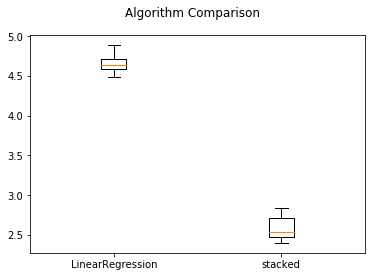

In [525]:
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=7,random_state=0)
	cv_results = cross_val_score(model,Xs, y,cv=kfold, scoring='neg_mean_squared_error')
	results.append(np.sqrt(np.abs(cv_results)))
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(np.sqrt(np.abs(cv_results))),np.std(np.sqrt(np.abs(cv_results)),ddof=1)))
   # boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
RF_ve=[]
RF_be=[]
for i in np.arange(1,100):

    ext = ExtraTreesRegressor(n_estimators=i,random_state=0)
    kfold = KFold(shuffle=True,n_splits=3,random_state=0)
    mse=cross_val_score(ext,Xs,y,cv=kfold,scoring='neg_mean_squared_error')
    rmse=np.sqrt(np.abs(mse))
    RF_be.append(np.mean(rmse))
    RF_ve.append(np.std(rmse,ddof=1))

In [ ]:
X_axis=np.arange(len(RF_be))
plt.plot(X_axis,RF_be)

In [ ]:
np.min(RF_be),np.argmin(RF_be)

### Random search

In [495]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 100, num = 50)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(20, 100, num = 20)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,6,7,8,9,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,3,4,5,6,7,8,9,10]
# Method of selecting samples for training each tree

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
print(random_grid)

{'n_estimators': [10, 11, 13, 15, 17, 19, 21, 22, 24, 26, 28, 30, 32, 33, 35, 37, 39, 41, 43, 44, 46, 48, 50, 52, 54, 55, 57, 59, 61, 63, 65, 66, 68, 70, 72, 74, 76, 77, 79, 81, 83, 85, 87, 88, 90, 92, 94, 96, 98, 100], 'max_features': ['auto', 'sqrt'], 'max_depth': [20, 24, 28, 32, 36, 41, 45, 49, 53, 57, 62, 66, 70, 74, 78, 83, 87, 91, 95, 100, None], 'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [496]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = GradientBoostingRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xs,y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=GradientBoostingRegressor(alpha=0.9,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                            

In [497]:
rf_random.best_params_

{'n_estimators': 87,
 'min_samples_split': 8,
 'min_samples_leaf': 6,
 'max_features': 'sqrt',
 'max_depth': None}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 100, num = 10)]
random_grid = {'n_estimators': n_estimators,
               }
print(random_grid)

In [ ]:
Rf_b=AdaBoostRegressor(base_estimator=RF1,random_state=0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = Rf_b, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xs,y)

In [ ]:
Rf_b=AdaBoostRegressor(base_estimator=RF1,random_state=0)
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = Rf_b, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(Xs,y)

In [ ]:
rf_random.best_params_

In [ ]:
# nestimators = 9

In [290]:
t = pd.read_csv("D:Test.csv")

In [291]:
t.head()

,AT,V,AP,RH
0,16.98,53.16,1013.95,82.80
1,9.60,41.03,1021.01,69.03
2,6.11,38.68,1017.53,79.23
3,12.34,43.22,1009.28,78.23
4,27.67,59.14,1016.51,61.20


In [292]:
t.shape

(38272, 4)

In [293]:
ts = sc.transform(t)

In [294]:
pred= stacked.predict(ts)

In [295]:
y_pred_prob_df=pd.DataFrame(data=pred, columns=['PE'])
y_pred_prob_df.head(10)

,PE
0,472.476126
1,494.700484
2,496.607433
3,480.402461
4,445.419600
5,460.451162
6,456.643769
7,463.725361
8,475.720913
9,472.738935


In [296]:
y_pred_prob_df.to_csv('E:/c1.csv',index=False)